In [17]:
import time     
import os         

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
df = pd.read_csv("dataframe.csv")
df

,Unnamed: 0,URL,version,km,year,color,origin_own,test_cost,price,num_of_hand,Engine_Size,electric,disel,gasoline,automatic,manual,private,leasing,rent,else
0,0,https://carwiz.co.il/used-cars/5f3b437b-630f-4...,מזדה 3 COMFORT,4400,2021,שנהב לבן,פרטית,1811,110000,2,1998.0,0,0,1,1,0,1,0,0,0
1,1,https://carwiz.co.il/used-cars/b0208639-3e00-4...,קיה פיקנטו LX,75000,2019,כסף,פרטית,1102,60000,1,1248.0,0,0,1,1,0,1,0,0,0
2,2,https://carwiz.co.il/used-cars/5f7f4b1f-c922-4...,ג'יפ רנגלר 2D SPORT S,46000,2021,שנהב לבן,פרטית,4731,243000,1,1995.0,0,0,1,1,0,1,0,0,0
3,3,https://carwiz.co.il/used-cars/c6d2aeac-5be6-4...,קיה סטוניק LX,16000,2021,שנהב לבן,ליסינג,1529,97000,3,998.0,0,0,1,1,0,0,1,0,0
4,4,https://carwiz.co.il/used-cars/ad61f115-6117-4...,מרצדס E קלאס E300 E AMG,33000,2020,שחור מטלי,פרטית,4731,347000,1,1991.0,1,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9155,9155,https://carwiz.co.il/used-cars/dff80b92-06d2-4...,אאודי TT,148000,2013,שנהב לבן,פרטית,1962,104999,6,1798.0,0,0,1,1,0,1,0,0,0
9156,9156,https://carwiz.co.il/used-cars/8cac6174-b4e7-4...,אסטון מרטין ונטאג',57000,2015,שחור,פרטית,2397,290000,5,4735.0,0,0,1,1,0,1,0,0,0
9157,9157,https://carwiz.co.il/used-cars/69974a04-4f25-4...,מזדה CX-5 EXECUTIVE,110000,2019,שחור,פרטית,2019,135744,1,1998.0,0,0,1,1,0,1,0,0,0
9158,9158,https://carwiz.co.il/used-cars/6252b2d0-b211-4...,אאודי Q3 LIMITED,135000,2018,כסף,פרטית,2563,140650,4,1984.0,0,0,1,1,0,1,0,0,0


In [25]:
# replace all zeros with null:

def replace_zero_with_null(df, columns):
    df_copy = df.copy()
    df_copy[columns] = df_copy[columns].replace(0, pd.NA)
    return df_copy

def replace_object_zero_with_null(df, columns):
    df_copy = df.copy()
    df_copy[columns] = df_copy[columns].replace("0", pd.NA)
    return df_copy

df_updated = replace_object_zero_with_null(df, ['km', 'test_cost', 'price', 'num_of_hand', 'URL', 'version', 'engine', 'year', 'gear', 'color', 'origin_own'])
df_updated = replace_zero_with_null(df_updated, ['km', 'test_cost', 'price', 'num_of_hand', 'URL', 'version', 'engine', 'year', 'gear', 'color', 'origin_own'])
df_updated


,URL,version,km,engine,year,gear,color,origin_own,test_cost,price,scanned,num_of_hand
0,https://carwiz.co.il/used-cars/0360526f-7586-4...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,NaN
1,https://carwiz.co.il/used-cars/5f3b437b-630f-4...,מזדה 3 COMFORT,4400,1998 ליטר בנזין,2021,אוטומטי,שנהב לבן,פרטית,1811,110000,1,2.0
2,https://carwiz.co.il/used-cars/b0208639-3e00-4...,קיה פיקנטו LX,75000,1248 ליטר בנזין,2019,אוטומטי,כסף,פרטית,1102,60000,1,1.0
3,https://carwiz.co.il/used-cars/5f7f4b1f-c922-4...,ג'יפ רנגלר 2D SPORT S,46000,1995 ליטר בנזין,2021,אוטומטי,שנהב לבן,פרטית,4731,243000,1,1.0
4,https://carwiz.co.il/used-cars/c6d2aeac-5be6-4...,קיה סטוניק LX,16000,998 ליטר בנזין,2021,אוטומטי,שנהב לבן,ליסינג,1529,97000,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10503,https://carwiz.co.il/used-cars/8e223337-98e9-4...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
10504,https://carwiz.co.il/used-cars/3864915c-58a9-4...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
10505,https://carwiz.co.il/used-cars/6fc2eb6b-02ae-4...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
10506,https://carwiz.co.il/used-cars/5e23b4d1-75b6-4...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [26]:
# delete all empty rows:

df_updated = df_updated.dropna(subset = ['price'])
df_updated

,URL,version,km,engine,year,gear,color,origin_own,test_cost,price,scanned,num_of_hand
1,https://carwiz.co.il/used-cars/5f3b437b-630f-4...,מזדה 3 COMFORT,4400,1998 ליטר בנזין,2021,אוטומטי,שנהב לבן,פרטית,1811,110000,1,2.0
2,https://carwiz.co.il/used-cars/b0208639-3e00-4...,קיה פיקנטו LX,75000,1248 ליטר בנזין,2019,אוטומטי,כסף,פרטית,1102,60000,1,1.0
3,https://carwiz.co.il/used-cars/5f7f4b1f-c922-4...,ג'יפ רנגלר 2D SPORT S,46000,1995 ליטר בנזין,2021,אוטומטי,שנהב לבן,פרטית,4731,243000,1,1.0
4,https://carwiz.co.il/used-cars/c6d2aeac-5be6-4...,קיה סטוניק LX,16000,998 ליטר בנזין,2021,אוטומטי,שנהב לבן,ליסינג,1529,97000,1,3.0
5,https://carwiz.co.il/used-cars/ad61f115-6117-4...,מרצדס E קלאס E300 E AMG,33000,1991 ליטר חשמל/בנזין,2020,אוטומטי,שחור מטלי,פרטית,4731,347000,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9534,https://carwiz.co.il/used-cars/dff80b92-06d2-4...,אאודי TT,148000,1798 ליטר בנזין,2013,אוטומטי,שנהב לבן,פרטית,1962,104999,1,6.0
9535,https://carwiz.co.il/used-cars/8cac6174-b4e7-4...,אסטון מרטין ונטאג',57000,4735 ליטר בנזין,2015,אוטומטי,שחור,פרטית,2397,290000,1,5.0
9536,https://carwiz.co.il/used-cars/69974a04-4f25-4...,מזדה CX-5 EXECUTIVE,110000,1998 ליטר בנזין,2019,אוטומטי,שחור,פרטית,2019,135744,1,1.0
9537,https://carwiz.co.il/used-cars/6252b2d0-b211-4...,אאודי Q3 LIMITED,135000,1984 ליטר בנזין,2018,<NA>,<NA>,<NA>,<NA>,140650,1,4.0


In [27]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9493 entries, 1 to 9538
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   URL          9493 non-null   object 
 1   version      9493 non-null   object 
 2   km           8499 non-null   object 
 3   engine       9493 non-null   object 
 4   year         9493 non-null   object 
 5   gear         9156 non-null   object 
 6   color        9492 non-null   object 
 7   origin_own   9491 non-null   object 
 8   test_cost    9100 non-null   object 
 9   price        9493 non-null   object 
 10  scanned      9493 non-null   int64  
 11  num_of_hand  9114 non-null   float64
dtypes: float64(1), int64(1), object(10)
memory usage: 964.1+ KB


In [37]:
# fill all missing km with the average each year
average_km_by_year = df_updated.groupby('year')['km'].transform('mean')
df_updated['km'] = df_updated['km'].fillna(average_km_by_year)
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9493 entries, 1 to 9538
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   URL          9493 non-null   object 
 1   version      9493 non-null   object 
 2   km           9493 non-null   float64
 3   engine       9493 non-null   object 
 4   year         9493 non-null   object 
 5   gear         9156 non-null   object 
 6   color        9492 non-null   object 
 7   origin_own   9491 non-null   object 
 8   test_cost    9100 non-null   object 
 9   price        9493 non-null   object 
 10  scanned      9493 non-null   int64  
 11  num_of_hand  9114 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 964.1+ KB


C:\Users\Nissim\AppData\Local\Temp\ipykernel_131124\1495453419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated['km'] = df_updated['km'].fillna(average_km_by_year)


In [38]:
# fill all missing gear with the most common gear each version 
most_common_gear_by_version = df_updated.groupby('version')['gear'].transform(lambda x: x.mode().iat[0] if len(x.mode()) > 0 else pd.NA)
df_updated['gear'] = df_updated['gear'].fillna(most_common_gear_by_version)
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9493 entries, 1 to 9538
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   URL          9493 non-null   object 
 1   version      9493 non-null   object 
 2   km           9493 non-null   float64
 3   engine       9493 non-null   object 
 4   year         9493 non-null   object 
 5   gear         9160 non-null   object 
 6   color        9492 non-null   object 
 7   origin_own   9491 non-null   object 
 8   test_cost    9100 non-null   object 
 9   price        9493 non-null   object 
 10  scanned      9493 non-null   int64  
 11  num_of_hand  9114 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 964.1+ KB


C:\Users\Nissim\AppData\Local\Temp\ipykernel_131124\3130456092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated['gear'] = df_updated['gear'].fillna(most_common_gear_by_version)


In [39]:
# drop all cars with no appropriate gear 
df_updated = df_updated.dropna( subset = ['gear'])
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9160 entries, 1 to 9538
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   URL          9160 non-null   object 
 1   version      9160 non-null   object 
 2   km           9160 non-null   float64
 3   engine       9160 non-null   object 
 4   year         9160 non-null   object 
 5   gear         9160 non-null   object 
 6   color        9159 non-null   object 
 7   origin_own   9158 non-null   object 
 8   test_cost    8851 non-null   object 
 9   price        9160 non-null   object 
 10  scanned      9160 non-null   int64  
 11  num_of_hand  8873 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 930.3+ KB


In [40]:
#fill the missing colors with the most common color each version
most_common_color_by_version = df_updated.groupby('version')['color'].transform(lambda x: x.mode().iat[0])
df_updated['color'] = df_updated['color'].fillna(most_common_color_by_version)
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9160 entries, 1 to 9538
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   URL          9160 non-null   object 
 1   version      9160 non-null   object 
 2   km           9160 non-null   float64
 3   engine       9160 non-null   object 
 4   year         9160 non-null   object 
 5   gear         9160 non-null   object 
 6   color        9160 non-null   object 
 7   origin_own   9158 non-null   object 
 8   test_cost    8851 non-null   object 
 9   price        9160 non-null   object 
 10  scanned      9160 non-null   int64  
 11  num_of_hand  8873 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 930.3+ KB


C:\Users\Nissim\AppData\Local\Temp\ipykernel_131124\4150584398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated['color'] = df_updated['color'].fillna(most_common_color_by_version)


In [42]:
#fill the missing owners with the most common ownership each version
most_common_ownership_by_version = df_updated.groupby('version')['origin_own'].transform(lambda x: x.mode().iat[0])
df_updated['origin_own'] = df_updated['origin_own'].fillna(most_common_ownership_by_version)
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9160 entries, 1 to 9538
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   URL          9160 non-null   object 
 1   version      9160 non-null   object 
 2   km           9160 non-null   float64
 3   engine       9160 non-null   object 
 4   year         9160 non-null   object 
 5   gear         9160 non-null   object 
 6   color        9160 non-null   object 
 7   origin_own   9160 non-null   object 
 8   test_cost    8851 non-null   object 
 9   price        9160 non-null   object 
 10  scanned      9160 non-null   int64  
 11  num_of_hand  8873 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 930.3+ KB


C:\Users\Nissim\AppData\Local\Temp\ipykernel_131124\2563415095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated['origin_own'] = df_updated['origin_own'].fillna(most_common_ownership_by_version)


In [47]:
#fill the missing test costs with the average each year
average_test_cost_by_year = df_updated.groupby('year')['test_cost'].transform(lambda x: x.mean() if len(x.mode()) > 0 else pd.NA)
df_updated['test_cost'] = df_updated['test_cost'].fillna(average_test_cost_by_year)
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9160 entries, 1 to 9538
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   URL          9160 non-null   object 
 1   version      9160 non-null   object 
 2   km           9160 non-null   float64
 3   engine       9160 non-null   object 
 4   year         9160 non-null   object 
 5   gear         9160 non-null   object 
 6   color        9160 non-null   object 
 7   origin_own   9160 non-null   object 
 8   test_cost    9160 non-null   float64
 9   price        9160 non-null   object 
 10  scanned      9160 non-null   int64  
 11  num_of_hand  8873 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 930.3+ KB


C:\Users\Nissim\AppData\Local\Temp\ipykernel_131124\3071120619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated['test_cost'] = df_updated['test_cost'].fillna(average_test_cost_by_year)


In [49]:
#fill the missing hand with the average each year
average_hand_by_year = df_updated.groupby('year')['num_of_hand'].transform(lambda x: x.mean() if len(x.mode()) > 0 else pd.NA)
df_updated['num_of_hand'] = df_updated['num_of_hand'].fillna(average_hand_by_year)
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9160 entries, 1 to 9538
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   URL          9160 non-null   object 
 1   version      9160 non-null   object 
 2   km           9160 non-null   float64
 3   engine       9160 non-null   object 
 4   year         9160 non-null   object 
 5   gear         9160 non-null   object 
 6   color        9160 non-null   object 
 7   origin_own   9160 non-null   object 
 8   test_cost    9160 non-null   float64
 9   price        9160 non-null   object 
 10  scanned      9160 non-null   int64  
 11  num_of_hand  9160 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 930.3+ KB


C:\Users\Nissim\AppData\Local\Temp\ipykernel_131124\3544069898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated['num_of_hand'] = df_updated['num_of_hand'].fillna(average_hand_by_year)


In [51]:
df_updated.drop('scanned', axis = 1, inplace = True)

C:\Users\Nissim\AppData\Local\Temp\ipykernel_131124\2521818680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated.drop('scanned', axis = 1, inplace = True)


In [55]:
df_updated.to_csv("dataframe.csv", encoding = 'utf-8-sig')

In [26]:
#checking if their are duplicats
df.duplicated().sum()
    

0

In [4]:
df.describe(include = 'all')

,URL,version,km,year,color,origin_own,test_cost,price,num_of_hand,Engine_Size,electric,disel,gasoline,automatic,manual,private,leasing,rent,else
count,9160,9160,9160.000000,9160.000000,9160,9160,9160.000000,9.160000e+03,9160.000000,9157.000000,9160.000000,9160.000000,9160.000000,9160.000000,9160.000000,9160.000000,9160.000000,9160.000000,9160.000000
unique,9145,1870,NaN,NaN,93,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,https://carwiz.co.il/used-cars/8e62c724-2ded-4...,סקודה אוקטביה AMBITION,NaN,NaN,שנהב לבן,פרטית,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,188,NaN,NaN,2947,5814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,93370.757096,2018.234389,NaN,NaN,2166.860371,1.474041e+05,1.657424,1794.960249,0.049236,0.126638,0.873035,0.968668,0.031332,0.634716,0.213319,0.016485,0.135480
std,NaN,NaN,68466.672877,3.335676,NaN,NaN,994.947118,1.353134e+05,0.985704,614.826847,0.216372,0.332585,0.332952,0.174223,0.174223,0.481536,0.409673,0.127337,0.342255
min,NaN,NaN,1.000000,2000.000000,NaN,NaN,880.000000,1.000000e+04,1.000000,898.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,40000.000000,2016.000000,NaN,NaN,1529.000000,7.000000e+04,1.000000,1399.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,91000.000000,2019.000000,NaN,NaN,1835.000000,1.060000e+05,1.000000,1598.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,135000.000000,2020.000000,NaN,NaN,2417.000000,1.700000e+05,2.000000,1998.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000


In [44]:
# turning continous into discrete variables 
df['num_of_hand'] = df['num_of_hand'].astype('int')
df['test_cost'] = df['test_cost'].astype('int')
df['year'] = df['year'].astype('int')
df['km'] = df['km'].astype('int')
df['price'] = df['price'].astype('int')


In [56]:
# separate engine into size and type
def extract_engine_type(engine):
    return re.sub(r'\d+', '', engine)

df['Engine_Type'] = df['engine'].apply(extract_engine_type)
df['Engine_Size'] = df['engine'].str.extract('(\d+)')
df

,URL,version,km,engine,year,gear,color,origin_own,test_cost,price,num_of_hand,Engine_Size,Engine_Type
0,https://carwiz.co.il/used-cars/5f3b437b-630f-4...,מזדה 3 COMFORT,4400,1998 ליטר בנזין,2021,אוטומטי,שנהב לבן,פרטית,1811,110000,2,1998,NaN
1,https://carwiz.co.il/used-cars/b0208639-3e00-4...,קיה פיקנטו LX,75000,1248 ליטר בנזין,2019,אוטומטי,כסף,פרטית,1102,60000,1,1248,NaN
2,https://carwiz.co.il/used-cars/5f7f4b1f-c922-4...,ג'יפ רנגלר 2D SPORT S,46000,1995 ליטר בנזין,2021,אוטומטי,שנהב לבן,פרטית,4731,243000,1,1995,NaN
3,https://carwiz.co.il/used-cars/c6d2aeac-5be6-4...,קיה סטוניק LX,16000,998 ליטר בנזין,2021,אוטומטי,שנהב לבן,ליסינג,1529,97000,3,998,NaN
4,https://carwiz.co.il/used-cars/ad61f115-6117-4...,מרצדס E קלאס E300 E AMG,33000,1991 ליטר חשמל/בנזין,2020,אוטומטי,שחור מטלי,פרטית,4731,347000,1,1991,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9155,https://carwiz.co.il/used-cars/dff80b92-06d2-4...,אאודי TT,148000,1798 ליטר בנזין,2013,אוטומטי,שנהב לבן,פרטית,1962,104999,6,1798,NaN
9156,https://carwiz.co.il/used-cars/8cac6174-b4e7-4...,אסטון מרטין ונטאג',57000,4735 ליטר בנזין,2015,אוטומטי,שחור,פרטית,2397,290000,5,4735,NaN
9157,https://carwiz.co.il/used-cars/69974a04-4f25-4...,מזדה CX-5 EXECUTIVE,110000,1998 ליטר בנזין,2019,אוטומטי,שחור,פרטית,2019,135744,1,1998,NaN
9158,https://carwiz.co.il/used-cars/6252b2d0-b211-4...,אאודי Q3 LIMITED,135000,1984 ליטר בנזין,2018,אוטומטי,כסף,פרטית,2563,140650,4,1984,NaN


In [60]:
df.describe(include = 'all')

,URL,version,km,engine,year,gear,color,origin_own,test_cost,price,num_of_hand,Engine_Size,Engine_Type
count,9160,9160,9160.000000,9160,9160.000000,9160,9160,9160,9160.000000,9.160000e+03,9160.000000,9157,9160
unique,9145,1870,NaN,218,NaN,2,93,4,NaN,NaN,NaN,175,5
top,https://carwiz.co.il/used-cars/8e62c724-2ded-4...,סקודה אוקטביה AMBITION,NaN,1998 ליטר בנזין,NaN,אוטומטי,שנהב לבן,פרטית,NaN,NaN,NaN,1998,ליטר בנזין
freq,2,188,NaN,714,NaN,8873,2947,5814,NaN,NaN,NaN,830,7566
mean,NaN,NaN,93370.757096,NaN,2018.234389,NaN,NaN,NaN,2166.860371,1.474041e+05,1.657424,NaN,NaN
std,NaN,NaN,68466.672877,NaN,3.335676,NaN,NaN,NaN,994.947118,1.353134e+05,0.985704,NaN,NaN
min,NaN,NaN,1.000000,NaN,2000.000000,NaN,NaN,NaN,880.000000,1.000000e+04,1.000000,NaN,NaN
25%,NaN,NaN,40000.000000,NaN,2016.000000,NaN,NaN,NaN,1529.000000,7.000000e+04,1.000000,NaN,NaN
50%,NaN,NaN,91000.000000,NaN,2019.000000,NaN,NaN,NaN,1835.000000,1.060000e+05,1.000000,NaN,NaN
75%,NaN,NaN,135000.000000,NaN,2020.000000,NaN,NaN,NaN,2417.000000,1.700000e+05,2.000000,NaN,NaN


In [63]:
df['Engine_Type'].unique()

array([' ליטר בנזין', ' ליטר חשמל/בנזין', ' ליטר דיזל', ' ליטר חשמל/דיזל',
       'חשמלי'], dtype=object)

In [65]:
# Creating new columns for engine types
df['disel'] = df['engine'].apply(lambda x: 1 if 'דיזל' in x else 0)
df['electric'] = df['engine'].apply(lambda x: 1 if 'חשמל' in x else 0)
df['gasoline'] = df['engine'].apply(lambda x: 1 if 'בנזין' in x else 0)
df

,URL,version,km,engine,year,gear,color,origin_own,test_cost,price,num_of_hand,Engine_Size,Engine_Type,electric,disel,gasoline
0,https://carwiz.co.il/used-cars/5f3b437b-630f-4...,מזדה 3 COMFORT,4400,1998 ליטר בנזין,2021,אוטומטי,שנהב לבן,פרטית,1811,110000,2,1998,ליטר בנזין,0,0,1
1,https://carwiz.co.il/used-cars/b0208639-3e00-4...,קיה פיקנטו LX,75000,1248 ליטר בנזין,2019,אוטומטי,כסף,פרטית,1102,60000,1,1248,ליטר בנזין,0,0,1
2,https://carwiz.co.il/used-cars/5f7f4b1f-c922-4...,ג'יפ רנגלר 2D SPORT S,46000,1995 ליטר בנזין,2021,אוטומטי,שנהב לבן,פרטית,4731,243000,1,1995,ליטר בנזין,0,0,1
3,https://carwiz.co.il/used-cars/c6d2aeac-5be6-4...,קיה סטוניק LX,16000,998 ליטר בנזין,2021,אוטומטי,שנהב לבן,ליסינג,1529,97000,3,998,ליטר בנזין,0,0,1
4,https://carwiz.co.il/used-cars/ad61f115-6117-4...,מרצדס E קלאס E300 E AMG,33000,1991 ליטר חשמל/בנזין,2020,אוטומטי,שחור מטלי,פרטית,4731,347000,1,1991,ליטר חשמל/בנזין,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9155,https://carwiz.co.il/used-cars/dff80b92-06d2-4...,אאודי TT,148000,1798 ליטר בנזין,2013,אוטומטי,שנהב לבן,פרטית,1962,104999,6,1798,ליטר בנזין,0,0,1
9156,https://carwiz.co.il/used-cars/8cac6174-b4e7-4...,אסטון מרטין ונטאג',57000,4735 ליטר בנזין,2015,אוטומטי,שחור,פרטית,2397,290000,5,4735,ליטר בנזין,0,0,1
9157,https://carwiz.co.il/used-cars/69974a04-4f25-4...,מזדה CX-5 EXECUTIVE,110000,1998 ליטר בנזין,2019,אוטומטי,שחור,פרטית,2019,135744,1,1998,ליטר בנזין,0,0,1
9158,https://carwiz.co.il/used-cars/6252b2d0-b211-4...,אאודי Q3 LIMITED,135000,1984 ליטר בנזין,2018,אוטומטי,כסף,פרטית,2563,140650,4,1984,ליטר בנזין,0,0,1


In [67]:
# Creating new columns for gear types
df['automatic'] = df['gear'].apply(lambda x: 1 if 'אוטומטי' in x else 0)
df['manual'] = df['gear'].apply(lambda x: 1 if 'ידני' in x else 0)
df.drop('gear', axis = 1, inplace = True)
df

,URL,version,km,year,gear,color,origin_own,test_cost,price,num_of_hand,Engine_Size,electric,disel,gasoline,automatic,manual
0,https://carwiz.co.il/used-cars/5f3b437b-630f-4...,מזדה 3 COMFORT,4400,2021,אוטומטי,שנהב לבן,פרטית,1811,110000,2,1998,0,0,1,1,0
1,https://carwiz.co.il/used-cars/b0208639-3e00-4...,קיה פיקנטו LX,75000,2019,אוטומטי,כסף,פרטית,1102,60000,1,1248,0,0,1,1,0
2,https://carwiz.co.il/used-cars/5f7f4b1f-c922-4...,ג'יפ רנגלר 2D SPORT S,46000,2021,אוטומטי,שנהב לבן,פרטית,4731,243000,1,1995,0,0,1,1,0
3,https://carwiz.co.il/used-cars/c6d2aeac-5be6-4...,קיה סטוניק LX,16000,2021,אוטומטי,שנהב לבן,ליסינג,1529,97000,3,998,0,0,1,1,0
4,https://carwiz.co.il/used-cars/ad61f115-6117-4...,מרצדס E קלאס E300 E AMG,33000,2020,אוטומטי,שחור מטלי,פרטית,4731,347000,1,1991,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9155,https://carwiz.co.il/used-cars/dff80b92-06d2-4...,אאודי TT,148000,2013,אוטומטי,שנהב לבן,פרטית,1962,104999,6,1798,0,0,1,1,0
9156,https://carwiz.co.il/used-cars/8cac6174-b4e7-4...,אסטון מרטין ונטאג',57000,2015,אוטומטי,שחור,פרטית,2397,290000,5,4735,0,0,1,1,0
9157,https://carwiz.co.il/used-cars/69974a04-4f25-4...,מזדה CX-5 EXECUTIVE,110000,2019,אוטומטי,שחור,פרטית,2019,135744,1,1998,0,0,1,1,0
9158,https://carwiz.co.il/used-cars/6252b2d0-b211-4...,אאודי Q3 LIMITED,135000,2018,אוטומטי,כסף,פרטית,2563,140650,4,1984,0,0,1,1,0


In [70]:
df['origin_own'].unique()

array(['פרטית', 'ליסינג', 'השכרה', 'אחר'], dtype=object)

In [72]:
# Creating new columns for ownership types
df['private'] = df['origin_own'].apply(lambda x: 1 if 'פרטית' in x else 0)
df['leasing'] = df['origin_own'].apply(lambda x: 1 if 'ליסינג' in x else 0)
df['rent'] = df['origin_own'].apply(lambda x: 1 if 'השכרה' in x else 0)
df['else'] = df['origin_own'].apply(lambda x: 1 if 'אחר' in x else 0)
df.drop('origin_own', axis = 1, inplace = True)
df

,URL,version,km,year,color,origin_own,test_cost,price,num_of_hand,Engine_Size,electric,disel,gasoline,automatic,manual,private,leasing,rent,else
0,https://carwiz.co.il/used-cars/5f3b437b-630f-4...,מזדה 3 COMFORT,4400,2021,שנהב לבן,פרטית,1811,110000,2,1998,0,0,1,1,0,1,0,0,0
1,https://carwiz.co.il/used-cars/b0208639-3e00-4...,קיה פיקנטו LX,75000,2019,כסף,פרטית,1102,60000,1,1248,0,0,1,1,0,1,0,0,0
2,https://carwiz.co.il/used-cars/5f7f4b1f-c922-4...,ג'יפ רנגלר 2D SPORT S,46000,2021,שנהב לבן,פרטית,4731,243000,1,1995,0,0,1,1,0,1,0,0,0
3,https://carwiz.co.il/used-cars/c6d2aeac-5be6-4...,קיה סטוניק LX,16000,2021,שנהב לבן,ליסינג,1529,97000,3,998,0,0,1,1,0,0,1,0,0
4,https://carwiz.co.il/used-cars/ad61f115-6117-4...,מרצדס E קלאס E300 E AMG,33000,2020,שחור מטלי,פרטית,4731,347000,1,1991,1,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9155,https://carwiz.co.il/used-cars/dff80b92-06d2-4...,אאודי TT,148000,2013,שנהב לבן,פרטית,1962,104999,6,1798,0,0,1,1,0,1,0,0,0
9156,https://carwiz.co.il/used-cars/8cac6174-b4e7-4...,אסטון מרטין ונטאג',57000,2015,שחור,פרטית,2397,290000,5,4735,0,0,1,1,0,1,0,0,0
9157,https://carwiz.co.il/used-cars/69974a04-4f25-4...,מזדה CX-5 EXECUTIVE,110000,2019,שחור,פרטית,2019,135744,1,1998,0,0,1,1,0,1,0,0,0
9158,https://carwiz.co.il/used-cars/6252b2d0-b211-4...,אאודי Q3 LIMITED,135000,2018,כסף,פרטית,2563,140650,4,1984,0,0,1,1,0,1,0,0,0


In [11]:
df.drop('URL', axis = 1, inplace = True)
df

,version,km,year,color,test_cost,price,num_of_hand,Engine_Size,electric,disel,gasoline,automatic,manual,private,leasing,rent,else
0,מזדה 3 COMFORT,4400,2021,שנהב לבן,1811,110000,2,1998.0,0,0,1,1,0,1,0,0,0
1,קיה פיקנטו LX,75000,2019,כסף,1102,60000,1,1248.0,0,0,1,1,0,1,0,0,0
2,ג'יפ רנגלר 2D SPORT S,46000,2021,שנהב לבן,4731,243000,1,1995.0,0,0,1,1,0,1,0,0,0
3,קיה סטוניק LX,16000,2021,שנהב לבן,1529,97000,3,998.0,0,0,1,1,0,0,1,0,0
4,מרצדס E קלאס E300 E AMG,33000,2020,שחור מטלי,4731,347000,1,1991.0,1,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9155,אאודי TT,148000,2013,שנהב לבן,1962,104999,6,1798.0,0,0,1,1,0,1,0,0,0
9156,אסטון מרטין ונטאג',57000,2015,שחור,2397,290000,5,4735.0,0,0,1,1,0,1,0,0,0
9157,מזדה CX-5 EXECUTIVE,110000,2019,שחור,2019,135744,1,1998.0,0,0,1,1,0,1,0,0,0
9158,אאודי Q3 LIMITED,135000,2018,כסף,2563,140650,4,1984.0,0,0,1,1,0,1,0,0,0


In [13]:
manufacturers = ["כל היצרנים", "טויוטה", "יונדאי" ,"קיה", "סקודה", "מיצובישי", "סוזוקי", "שברולט" ,"ניסאן", "פיג'ו","סיטרואן","רנו" ,"פולקסווגן","MG" ,"סיאט","אאודי" ,"מרצדס","DS", "GAC","MAXUS" ,"SERES","אבראט","אופל" ,"איווייס" ,"אינפיניטי" ,"איסוזו","אלפא רומיאו","אסטון מרטין","ב מ וו" ,"בי ווי די" ,"דייהטסו" ,"הונגצ'י" ,"הונדה" ,"וולבו","טסלה","יגואר"
  ,"לינק אנד קו","ליפמוטור", "לנד רובר","לנצ'יה","לקסוס" 
 ,"מזארטי" 
 ,"מזדה" 
 , "מיני" 
,"סאנגיונג" 
,"סובארו" 
 , "סמארט" 
 ,"סקיוול"
 ,"פולסטאר" 
 , "פורד" 
,"פורשה" 
,"פיאט" 
,"פרארי"
 ,"צ'רי"
,"קאדילאק" 
  ,"קופרה" 
 , "קרייזלר" ,"דודג","דאציה", "גילי", "ג'נסיס", "ג'יפ", "ביואיק"
]


In [14]:
# separate version into Manufacturer and Model
df['Manufacturer'] = df['version'].apply(lambda x: next((m for m in manufacturers if m in x), None))
df['Model'] = df['version'].apply(lambda x: x.replace(df['Manufacturer'].loc[df['Manufacturer'].isin([m for m in manufacturers if m in x])].values[0], '').strip())
df

,version,km,year,color,test_cost,price,num_of_hand,Engine_Size,electric,disel,gasoline,automatic,manual,private,leasing,rent,else,Manufacturer,Model
0,מזדה 3 COMFORT,4400,2021,שנהב לבן,1811,110000,2,1998.0,0,0,1,1,0,1,0,0,0,מזדה,3 COMFORT
1,קיה פיקנטו LX,75000,2019,כסף,1102,60000,1,1248.0,0,0,1,1,0,1,0,0,0,קיה,פיקנטו LX
2,ג'יפ רנגלר 2D SPORT S,46000,2021,שנהב לבן,4731,243000,1,1995.0,0,0,1,1,0,1,0,0,0,ג'יפ,רנגלר 2D SPORT S
3,קיה סטוניק LX,16000,2021,שנהב לבן,1529,97000,3,998.0,0,0,1,1,0,0,1,0,0,קיה,סטוניק LX
4,מרצדס E קלאס E300 E AMG,33000,2020,שחור מטלי,4731,347000,1,1991.0,1,0,1,1,0,1,0,0,0,MG,מרצדס E קלאס E300 E A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9155,אאודי TT,148000,2013,שנהב לבן,1962,104999,6,1798.0,0,0,1,1,0,1,0,0,0,אאודי,TT
9156,אסטון מרטין ונטאג',57000,2015,שחור,2397,290000,5,4735.0,0,0,1,1,0,1,0,0,0,אסטון מרטין,ונטאג'
9157,מזדה CX-5 EXECUTIVE,110000,2019,שחור,2019,135744,1,1998.0,0,0,1,1,0,1,0,0,0,מזדה,CX-5 EXECUTIVE
9158,אאודי Q3 LIMITED,135000,2018,כסף,2563,140650,4,1984.0,0,0,1,1,0,1,0,0,0,אאודי,Q3 LIMITED


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9160 entries, 0 to 9159
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   version       9160 non-null   object 
 1   km            9160 non-null   int64  
 2   year          9160 non-null   int64  
 3   color         9160 non-null   object 
 4   test_cost     9160 non-null   int64  
 5   price         9160 non-null   int64  
 6   num_of_hand   9160 non-null   int64  
 7   Engine_Size   9157 non-null   float64
 8   electric      9160 non-null   int64  
 9   disel         9160 non-null   int64  
 10  gasoline      9160 non-null   int64  
 11  automatic     9160 non-null   int64  
 12  manual        9160 non-null   int64  
 13  private       9160 non-null   int64  
 14  leasing       9160 non-null   int64  
 15  rent          9160 non-null   int64  
 16  else          9160 non-null   int64  
 17  Manufacturer  9160 non-null   object 
 18  Model         9160 non-null 

In [18]:
# fill the missing engine size with the most common each version
most_common_engine_size_by_version = df.groupby('version')['Engine_Size'].transform(lambda x: x.mode().iat[0])
df['Engine_Size'] = df['Engine_Size'].fillna(most_common_engine_size_by_version)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9160 entries, 0 to 9159
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   version       9160 non-null   object 
 1   km            9160 non-null   int64  
 2   year          9160 non-null   int64  
 3   color         9160 non-null   object 
 4   test_cost     9160 non-null   int64  
 5   price         9160 non-null   int64  
 6   num_of_hand   9160 non-null   int64  
 7   Engine_Size   9160 non-null   float64
 8   electric      9160 non-null   int64  
 9   disel         9160 non-null   int64  
 10  gasoline      9160 non-null   int64  
 11  automatic     9160 non-null   int64  
 12  manual        9160 non-null   int64  
 13  private       9160 non-null   int64  
 14  leasing       9160 non-null   int64  
 15  rent          9160 non-null   int64  
 16  else          9160 non-null   int64  
 17  Manufacturer  9160 non-null   object 
 18  Model         9160 non-null 

In [20]:
df.drop('version', axis = 1, inplace = True)
df

,km,year,color,test_cost,price,num_of_hand,Engine_Size,electric,disel,gasoline,automatic,manual,private,leasing,rent,else,Manufacturer,Model
0,4400,2021,שנהב לבן,1811,110000,2,1998.0,0,0,1,1,0,1,0,0,0,מזדה,3 COMFORT
1,75000,2019,כסף,1102,60000,1,1248.0,0,0,1,1,0,1,0,0,0,קיה,פיקנטו LX
2,46000,2021,שנהב לבן,4731,243000,1,1995.0,0,0,1,1,0,1,0,0,0,ג'יפ,רנגלר 2D SPORT S
3,16000,2021,שנהב לבן,1529,97000,3,998.0,0,0,1,1,0,0,1,0,0,קיה,סטוניק LX
4,33000,2020,שחור מטלי,4731,347000,1,1991.0,1,0,1,1,0,1,0,0,0,MG,מרצדס E קלאס E300 E A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9155,148000,2013,שנהב לבן,1962,104999,6,1798.0,0,0,1,1,0,1,0,0,0,אאודי,TT
9156,57000,2015,שחור,2397,290000,5,4735.0,0,0,1,1,0,1,0,0,0,אסטון מרטין,ונטאג'
9157,110000,2019,שחור,2019,135744,1,1998.0,0,0,1,1,0,1,0,0,0,מזדה,CX-5 EXECUTIVE
9158,135000,2018,כסף,2563,140650,4,1984.0,0,0,1,1,0,1,0,0,0,אאודי,Q3 LIMITED


C:\Users\Nissim\AppData\Local\Temp\ipykernel_29552\3985994472.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax, figsize=(10,40))


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'km'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'test_cost'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'num_of_hand'}>,
        <Axes: title={'center': 'Engine_Size'}>,
        <Axes: title={'center': 'electric'}>],
       [<Axes: title={'center': 'disel'}>,
        <Axes: title={'center': 'gasoline'}>,
        <Axes: title={'center': 'automatic'}>,
        <Axes: title={'center': 'manual'}>],
       [<Axes: title={'center': 'private'}>,
        <Axes: title={'center': 'leasing'}>,
        <Axes: title={'center': 'rent'}>,
        <Axes: title={'center': 'else'}>]], dtype=object)

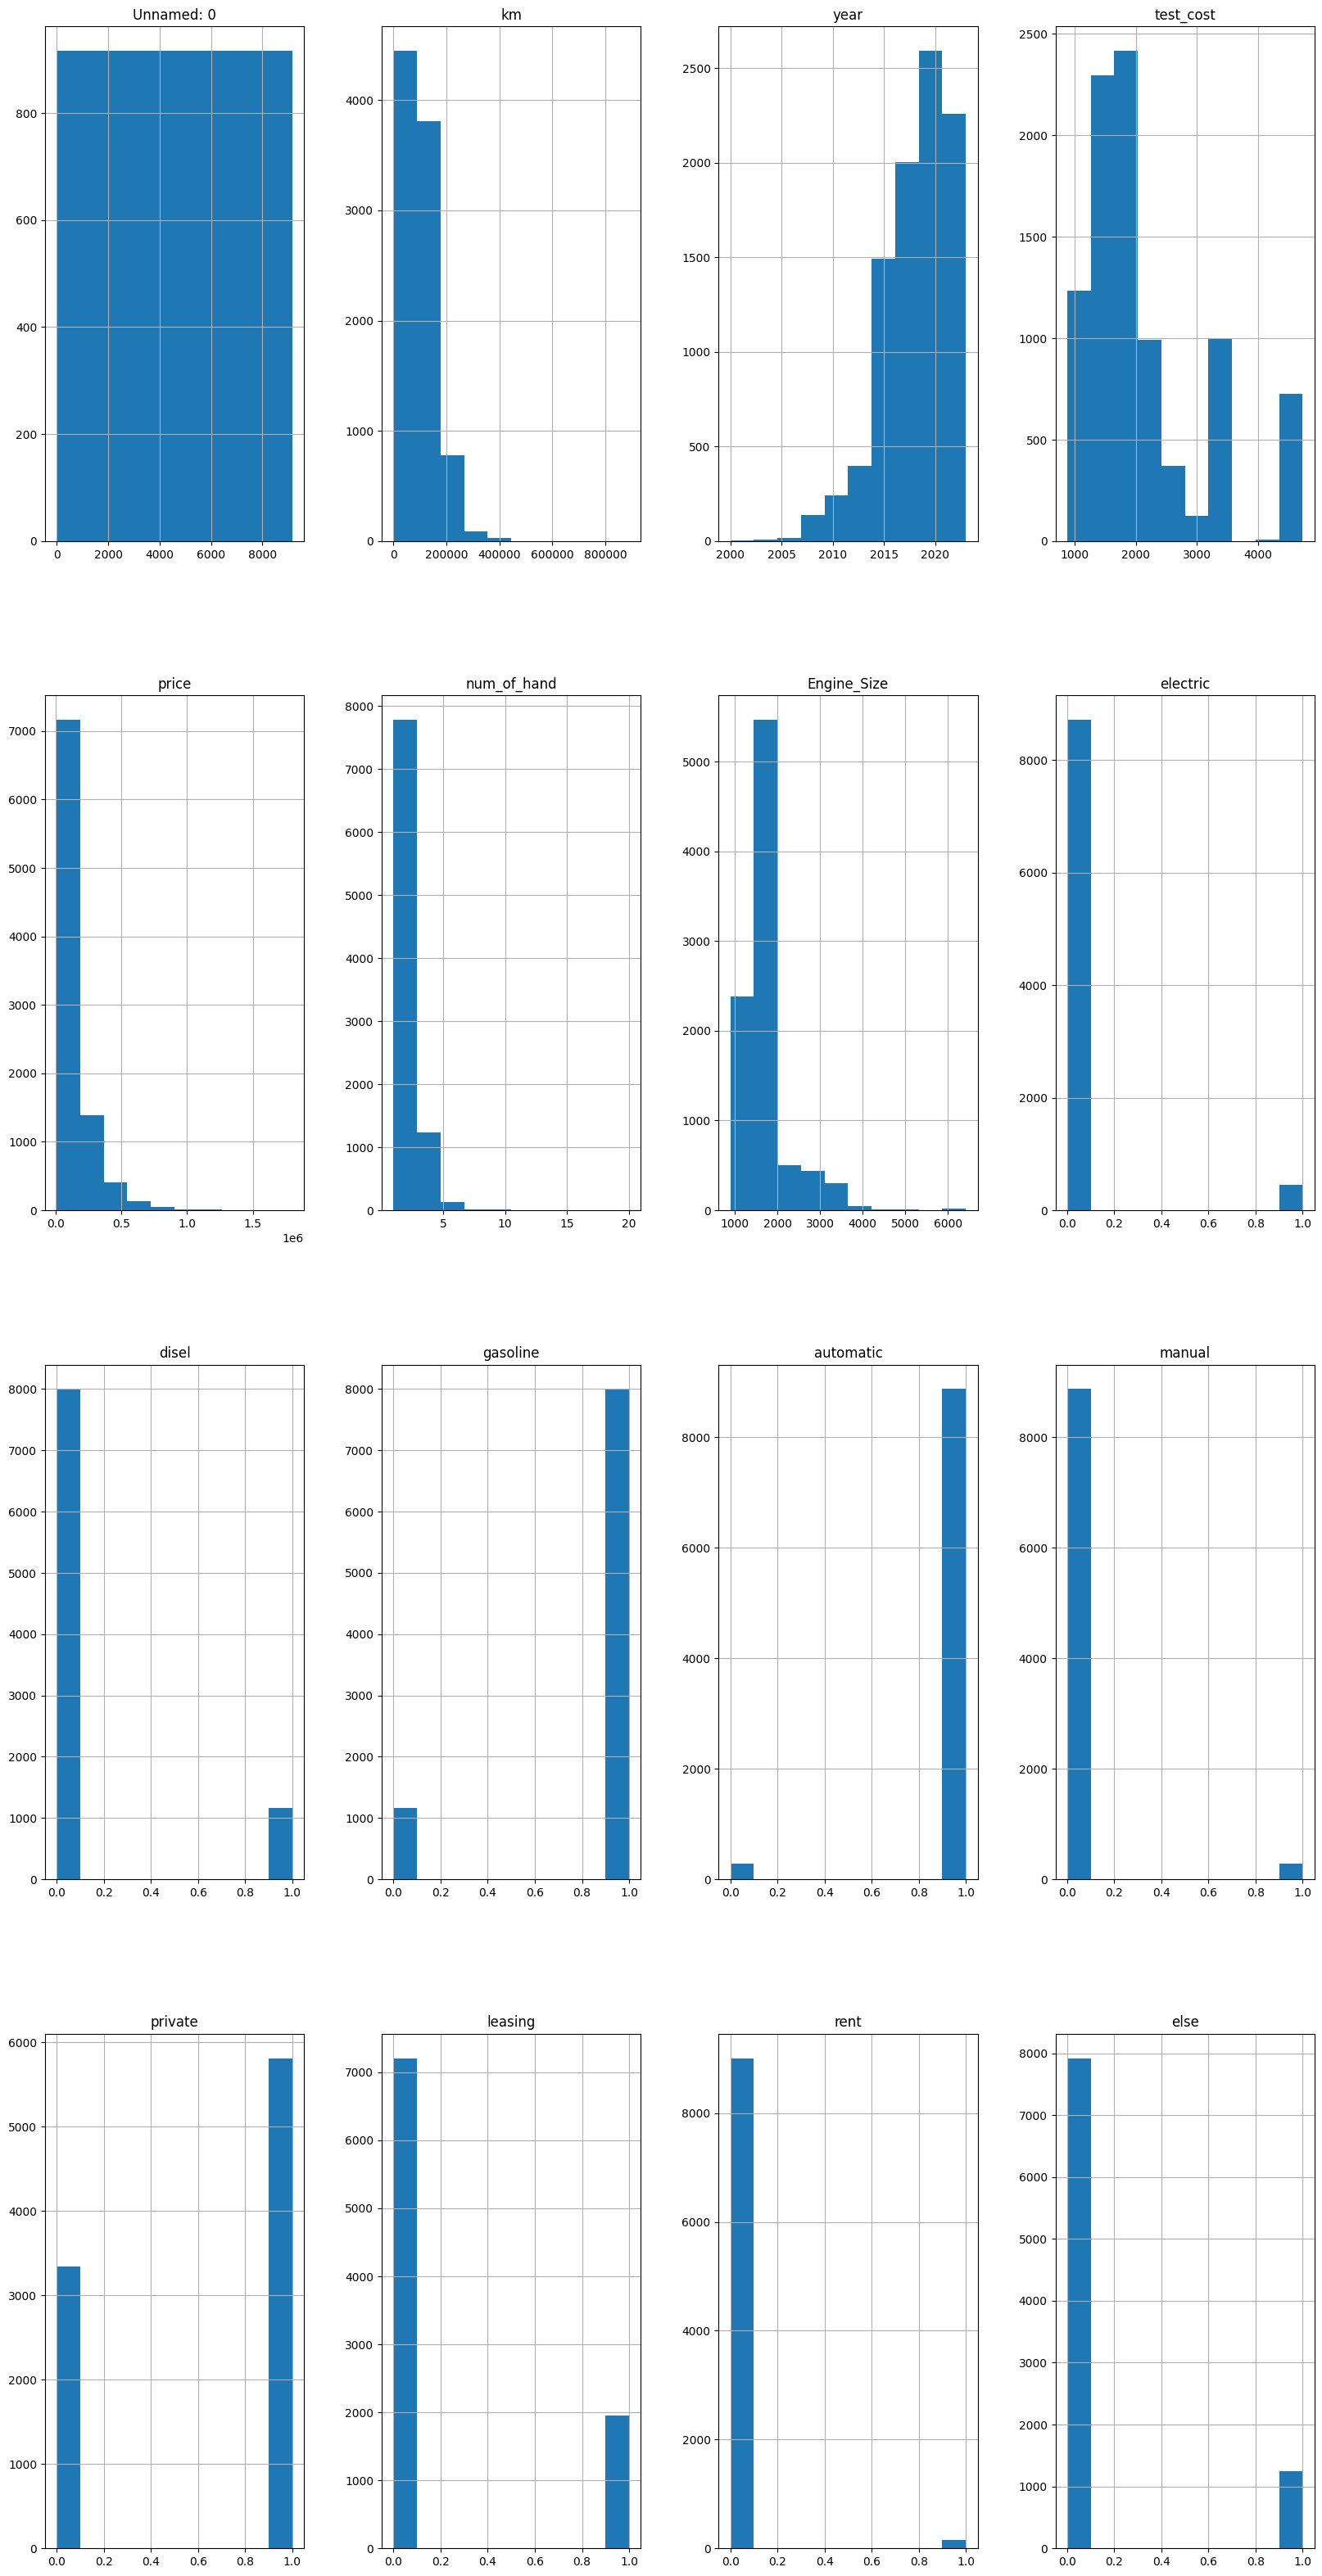

In [6]:
# Display all columns to check for outliers
fig, ax = plt.subplots(figsize=(20,40))
df.hist(ax=ax, figsize=(10,40))

In [11]:
# remove all outliers
df = df[(df['km'] <= 350000)]
df = df[(df['year'] >= 2008)]
df = df[(df['price'] <= 500000)]
df = df[(df['num_of_hand'] <= 5)]
df = df[(df['Engine_Size'] <= 3700)]
df

,Unnamed: 0,km,year,color,test_cost,price,num_of_hand,Engine_Size,electric,disel,gasoline,automatic,manual,private,leasing,rent,else,Manufacturer,Model
0,0,4400,2021,שנהב לבן,1811,110000,2,1998.0,0,0,1,1,0,1,0,0,0,מזדה,3 COMFORT
1,1,75000,2019,כסף,1102,60000,1,1248.0,0,0,1,1,0,1,0,0,0,קיה,פיקנטו LX
2,2,46000,2021,שנהב לבן,4731,243000,1,1995.0,0,0,1,1,0,1,0,0,0,ג'יפ,רנגלר 2D SPORT S
3,3,16000,2021,שנהב לבן,1529,97000,3,998.0,0,0,1,1,0,0,1,0,0,קיה,סטוניק LX
4,4,33000,2020,שחור מטלי,4731,347000,1,1991.0,1,0,1,1,0,1,0,0,0,MG,מרצדס E קלאס E300 E A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,9153,28000,2019,כסוף כהה,1102,80900,1,1248.0,0,0,1,1,0,1,0,0,0,קיה,פיקנטו EX
9154,9154,150730,2016,כסף,1693,74900,2,1591.0,0,0,1,1,0,1,0,0,0,קיה,ספורטז' PREMIUM GT
9157,9157,110000,2019,שחור,2019,135744,1,1998.0,0,0,1,1,0,1,0,0,0,מזדה,CX-5 EXECUTIVE
9158,9158,135000,2018,כסף,2563,140650,4,1984.0,0,0,1,1,0,1,0,0,0,אאודי,Q3 LIMITED


In [12]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df


,km,year,color,test_cost,price,num_of_hand,Engine_Size,electric,disel,gasoline,automatic,manual,private,leasing,rent,else,Manufacturer,Model
0,4400,2021,שנהב לבן,1811,110000,2,1998.0,0,0,1,1,0,1,0,0,0,מזדה,3 COMFORT
1,75000,2019,כסף,1102,60000,1,1248.0,0,0,1,1,0,1,0,0,0,קיה,פיקנטו LX
2,46000,2021,שנהב לבן,4731,243000,1,1995.0,0,0,1,1,0,1,0,0,0,ג'יפ,רנגלר 2D SPORT S
3,16000,2021,שנהב לבן,1529,97000,3,998.0,0,0,1,1,0,0,1,0,0,קיה,סטוניק LX
4,33000,2020,שחור מטלי,4731,347000,1,1991.0,1,0,1,1,0,1,0,0,0,MG,מרצדס E קלאס E300 E A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,28000,2019,כסוף כהה,1102,80900,1,1248.0,0,0,1,1,0,1,0,0,0,קיה,פיקנטו EX
9154,150730,2016,כסף,1693,74900,2,1591.0,0,0,1,1,0,1,0,0,0,קיה,ספורטז' PREMIUM GT
9157,110000,2019,שחור,2019,135744,1,1998.0,0,0,1,1,0,1,0,0,0,מזדה,CX-5 EXECUTIVE
9158,135000,2018,כסף,2563,140650,4,1984.0,0,0,1,1,0,1,0,0,0,אאודי,Q3 LIMITED


In [14]:
# remove Manufacturer outliers
df = df.drop(df[df['Manufacturer'] == 'אבראט'].index)
df = df.drop(df[df['Manufacturer'] == 'ביואיק'].index)
df = df.drop(df[df['Manufacturer'] == 'יגואר'].index)
df = df.drop(df[df['Manufacturer'] == 'פורשה'].index)
df = df.drop(df[df['Manufacturer'] == "ג'נסיס"].index)
df = df.drop(df[df['Manufacturer'] == 'דייהטסו'].index)
df = df.drop(df[df['Manufacturer'] == 'DS'].index)
df = df.drop(df[df['Manufacturer'] == 'קרייזלר'].index)
df = df.drop(df[df['Manufacturer'] == 'לינק אנד קו'].index)
df = df.drop(df[df['Manufacturer'] == "דודג'"].index)
df = df.drop(df[df['Manufacturer'] == 'סמארט'].index)
df = df.drop(df[df['Manufacturer'] == "לנצ'יה"].index)
df = df.drop(df[df['Manufacturer'] == 'MAXUS'].index)
df

,km,year,color,test_cost,price,num_of_hand,Engine_Size,electric,disel,gasoline,automatic,manual,private,leasing,rent,else,Manufacturer,Model
0,4400,2021,שנהב לבן,1811,110000,2,1998.0,0,0,1,1,0,1,0,0,0,מזדה,3 COMFORT
1,75000,2019,כסף,1102,60000,1,1248.0,0,0,1,1,0,1,0,0,0,קיה,פיקנטו LX
2,46000,2021,שנהב לבן,4731,243000,1,1995.0,0,0,1,1,0,1,0,0,0,ג'יפ,רנגלר 2D SPORT S
3,16000,2021,שנהב לבן,1529,97000,3,998.0,0,0,1,1,0,0,1,0,0,קיה,סטוניק LX
4,33000,2020,שחור מטלי,4731,347000,1,1991.0,1,0,1,1,0,1,0,0,0,MG,מרצדס E קלאס E300 E A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,28000,2019,כסוף כהה,1102,80900,1,1248.0,0,0,1,1,0,1,0,0,0,קיה,פיקנטו EX
9154,150730,2016,כסף,1693,74900,2,1591.0,0,0,1,1,0,1,0,0,0,קיה,ספורטז' PREMIUM GT
9157,110000,2019,שחור,2019,135744,1,1998.0,0,0,1,1,0,1,0,0,0,מזדה,CX-5 EXECUTIVE
9158,135000,2018,כסף,2563,140650,4,1984.0,0,0,1,1,0,1,0,0,0,אאודי,Q3 LIMITED


In [20]:
# Convert strings into numbers
df.drop('Model', axis = 1, inplace = True)
df.drop('color', axis = 1, inplace = True)

label_encoder = LabelEncoder()
label_encoder.fit(df['Manufacturer'])
df['Manufacturer'] = label_encoder.fit_transform(df['Manufacturer'])
df

,km,year,test_cost,price,num_of_hand,Engine_Size,electric,disel,gasoline,automatic,manual,private,leasing,rent,else,Manufacturer
0,4400,2021,1811,110000,2,1998.0,0,0,1,1,0,1,0,0,0,17
1,75000,2019,1102,60000,1,1248.0,0,0,1,1,0,1,0,0,0,35
2,46000,2021,4731,243000,1,1995.0,0,0,1,1,0,1,0,0,0,7
3,16000,2021,1529,97000,3,998.0,0,0,1,1,0,0,1,0,0,35
4,33000,2020,4731,347000,1,1991.0,1,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,28000,2019,1102,80900,1,1248.0,0,0,1,1,0,1,0,0,0,35
9154,150730,2016,1693,74900,2,1591.0,0,0,1,1,0,1,0,0,0,35
9157,110000,2019,2019,135744,1,1998.0,0,0,1,1,0,1,0,0,0,17
9158,135000,2018,2563,140650,4,1984.0,0,0,1,1,0,1,0,0,0,1


In [21]:
df.to_csv('dataframe.csv', encoding = 'utf-8-sig')